### 1. Regresión lineal

In [29]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

**Paso 1. Lectura del conjunto de datos procesado**

In [4]:
train_data = pd.read_csv("/workspaces/machine-learning-python-template3-JohnnyXavierReyesBorbor/data/processed/clean_train.csv")
test_data = pd.read_csv("/workspaces/machine-learning-python-template3-JohnnyXavierReyesBorbor/data/processed/clean_test.csv")

train_data.head()

,smoker_n,age,bmi,children,charges
0,1.0,0.108696,0.230024,0.0,2396.09590
1,1.0,0.065217,0.263250,0.4,3279.86855
2,1.0,0.739130,0.580172,0.4,33471.97189
3,1.0,0.978261,0.686306,0.0,13405.39030
4,1.0,0.630435,0.286252,0.4,9715.84100


In [9]:
total_data = pd.concat([train_data, test_data])
total_data.info()
variables = total_data.select_dtypes(include=["int64", "float64"]).columns.tolist()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 267
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   smoker_n  1337 non-null   float64
 1   age       1337 non-null   float64
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   float64
 4   charges   1337 non-null   float64
dtypes: float64(5)
memory usage: 62.7 KB


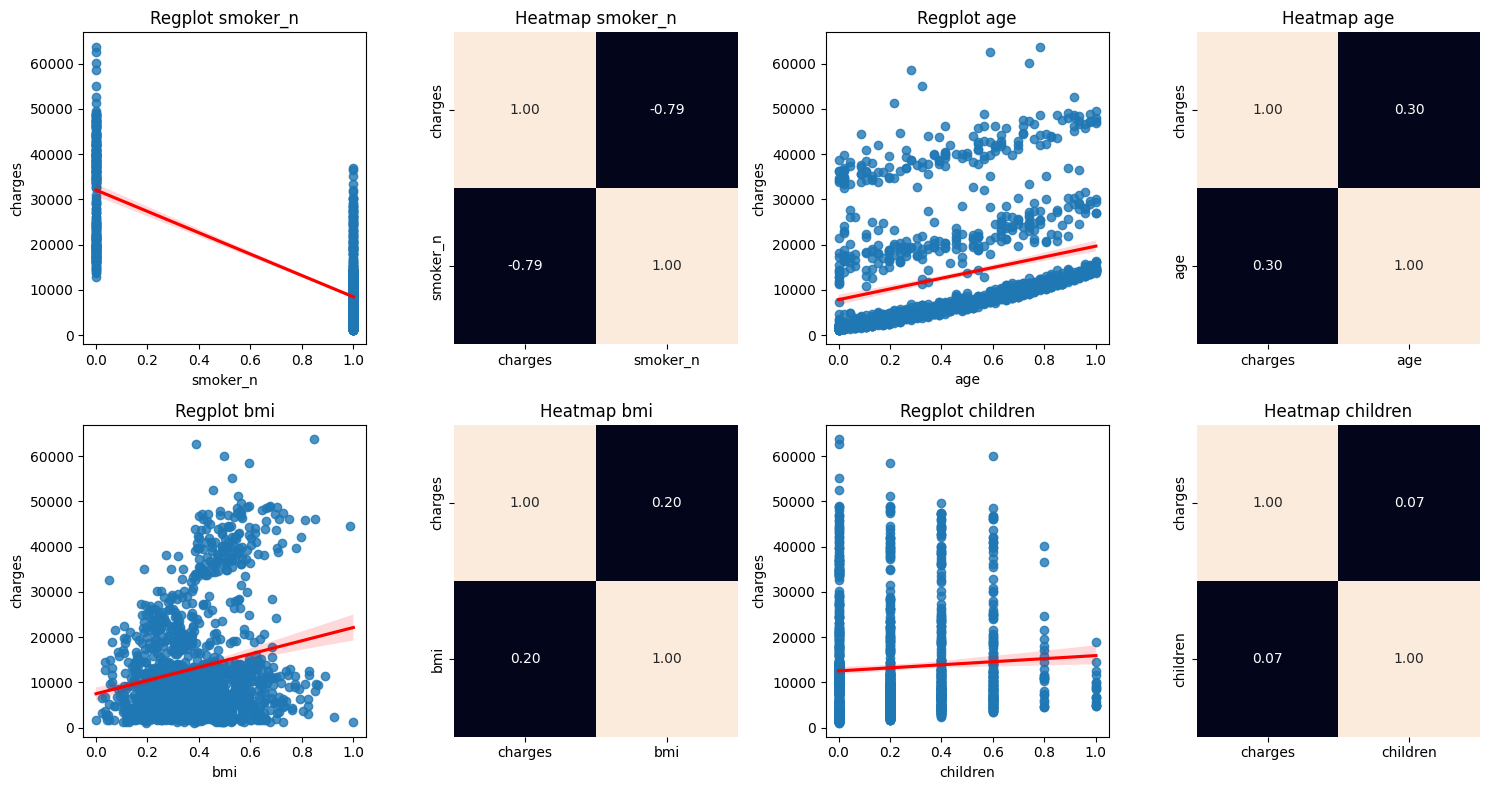

In [25]:
n_cols = 4
target="charges"
vars_num_sin_pred=[col for col in variables if col != target]
n_rows =2*( math.ceil(len(vars_num_sin_pred) / n_cols))

fig, axis = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axis = axis.flatten()
for i, col in enumerate(vars_num_sin_pred):
    sns.regplot(ax = axis[2*i], data = total_data, x = col, y = "charges",line_kws={"color": "red"})
    axis[2*i].set_title(f"Regplot {col}")
    sns.heatmap(total_data[["charges",col]].corr(), annot = True, fmt = ".2f", ax = axis[2*i + 1], cbar = False)
    axis[2*i + 1].set_title(f"Heatmap {col}")

# Eliminar subplots sobrantes
for j in range(2*i + 2, len(axis)):
    fig.delaxes(axis[j])

plt.tight_layout()
plt.show()


**Paso 2: Inicialización y entrenamiento del modelo**

In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [27]:
print(f"Intercepto (a): {model.intercept_}")
print(f"Coeficientes (b): {model.coef_}")

Intercepto (a): 21143.269121973954
Coeficientes (b): [-23042.50723793  11462.79943201  11346.78939471   2689.8609795 ]


**Paso 3: Predicción del modelo**

In [28]:
y_pred = model.predict(X_test)
y_pred

array([ 7826.71976716,  5936.53265111, 14173.07782788, 31622.75075546,
        9263.34093635, 13480.14887712, 29787.25790395,  1643.45719872,
       10876.17888434, 11325.66257258, 10382.00922092, 33095.82145191,
       30563.99442887, 17375.68543919, 10170.05222026,  9793.97788271,
        4338.87322262, 32040.02942064,  3533.00631632,  5540.63300408,
        3800.90102672, 29849.73579925, 15058.38135413, 30681.25821127,
       30855.22159196,  5318.35517484, 35651.38184556, 36750.00646392,
       10887.72705446, 13731.47292098,  5951.31281261, 13057.0503156 ,
         885.50217102, 12378.3628904 , 39714.81547966, 12430.12415904,
        4898.39413804,  3922.99091642, 31372.98531615,  9306.77316642,
        6376.62829275, 29696.01315781, 35095.36875728, 11850.11609205,
        7372.07939253,  3596.50605624,  5524.8651415 ,  9123.94398722,
        4175.68935164,  9410.0034801 ,  6870.37575452, 11482.89235724,
       30753.06314612,  3901.63926993, 11213.80257282, 10152.26872403,
      

In [30]:
print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 35914551.480433606
Coeficiente de determinación: 0.8045531086669289
